In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [115]:
df=pd.read_csv('hr.csv')

In [103]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [90]:
df.shape

(1470, 35)

There are 1470 rows and 35 columns in our dataset

In [91]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in our dataset

In [92]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are 26 columns of numeric type and 8 columns of object type

<AxesSubplot:xlabel='Attrition', ylabel='count'>

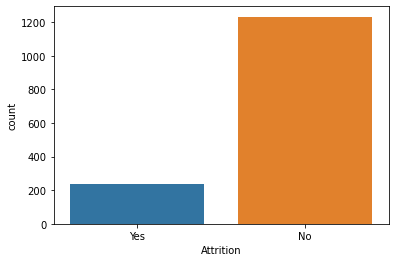

In [9]:
sns.countplot(df['Attrition'])

We can see our target variable is highly imbalanced. Sp, we have to balance the data before evaluation

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

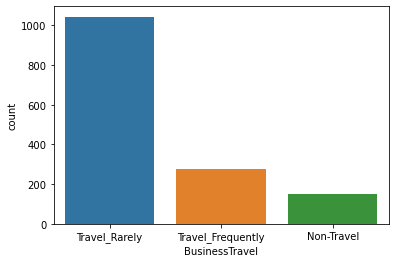

In [10]:
sns.countplot(df['BusinessTravel'])

Most of the employee travel rarely, while very few employee travel for business purpose.

<AxesSubplot:xlabel='Department', ylabel='count'>

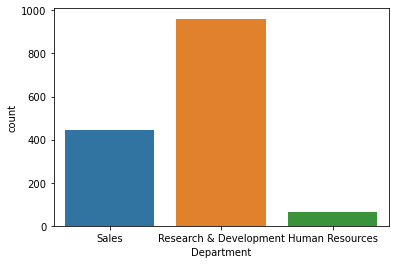

In [11]:
sns.countplot(df['Department'])

More employees work at R&D Department followed by Sales and HR

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

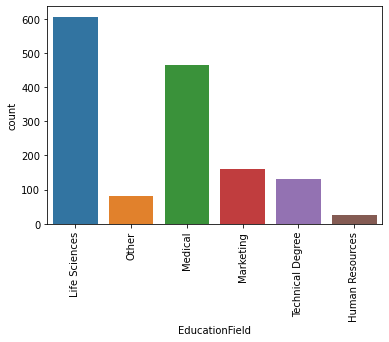

In [13]:
sns.countplot(df['EducationField'])
plt.xticks(rotation=90)

Life Science and Medical tops the educational field, while HR remains the least opted.

<AxesSubplot:xlabel='Gender', ylabel='count'>

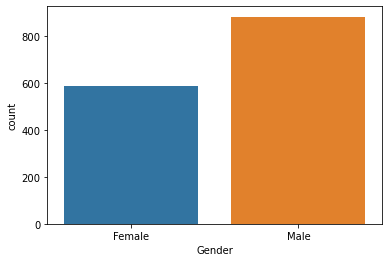

In [14]:
sns.countplot(df['Gender'])

There are more male employee than female employee

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

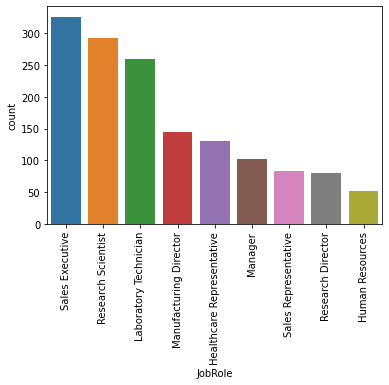

In [16]:
sns.countplot(df['JobRole'])
plt.xticks(rotation=90)

Sales Executive, Research Scientist and Lab Technician profile have highest number of employees

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

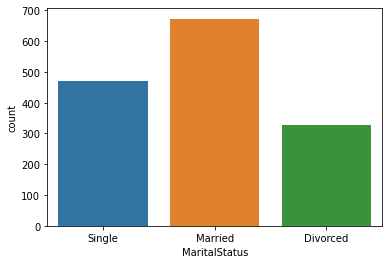

In [17]:
sns.countplot(df['MaritalStatus'])


Majority of the employees are married or are single. Less number of divorced emplloyee are working

<AxesSubplot:xlabel='Over18', ylabel='count'>

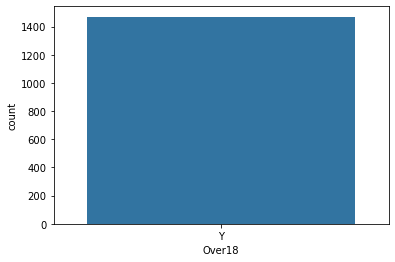

In [18]:
sns.countplot(df['Over18'])

All the employee must be over18, this column is irrelevant. So we will drop it

<AxesSubplot:xlabel='OverTime', ylabel='count'>

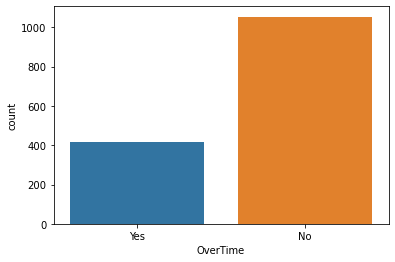

In [19]:
sns.countplot(df['OverTime'])

Very few employee works overtime.

In [23]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


1. As there is only one value in Over18 and StandardHour, we can drop those columns

2. There is some skewness in DistanceFromHome, Job Level,Monthly income

In [116]:
df.drop('Over18',axis=1,inplace=True)

In [26]:
#Extracting numerical features for further evaluation
num_features = df.select_dtypes(include=[np.number]) 
num_features.dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

<AxesSubplot:xlabel='Department', ylabel='count'>

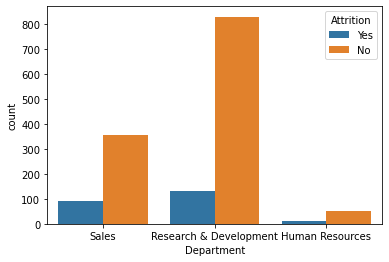

In [29]:
sns.countplot(x ='Department', hue = "Attrition", data = df)  

We can see Attriton is high in R&D Deaprtment, but compared to No attrition it is significantly low

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

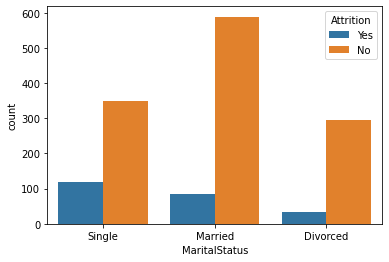

In [31]:
sns.countplot(x ='MaritalStatus', hue = "Attrition", data = df)  

Single people have high attrition rate compared to married and divorced.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

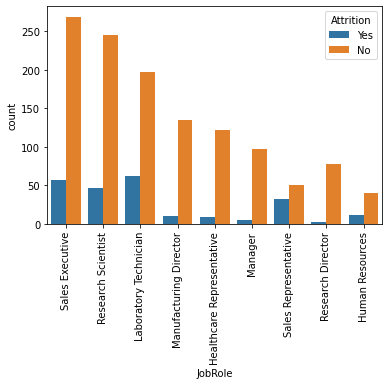

In [34]:
sns.countplot(x ='JobRole', hue = "Attrition", data = df)
plt.xticks(rotation=90)

Lab Technician, Sales Executive and Research scientist seems to change job more frequently than other job roles.

<AxesSubplot:xlabel='Gender', ylabel='count'>

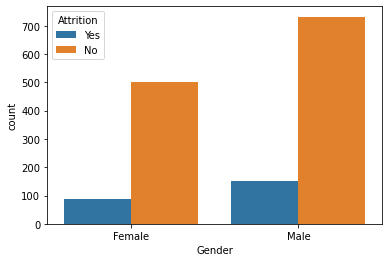

In [35]:
sns.countplot(x ='Gender', hue = "Attrition", data = df)

As expectd, Males are more likely to switch multiple comapnies than females

<AxesSubplot:>

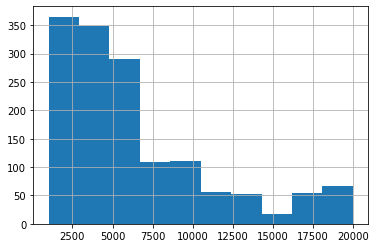

In [43]:
df['MonthlyIncome'].hist()

Monthly income of the employees ranges between 2500 to 20k with very few people above 10k

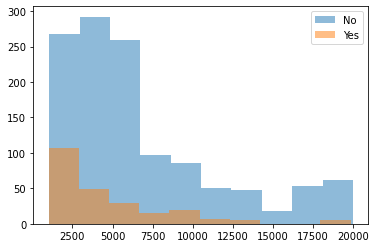

In [46]:
x = df[df['Attrition'].str.contains("Yes")]
y = df[df['Attrition'].str.contains("No")]
plt.hist(y['MonthlyIncome'], alpha=0.5,label='No')
plt.hist(x['MonthlyIncome'], alpha=0.5,label='Yes')
plt.legend(loc='upper right')
plt.show()

Employees with low monthly income are likely to change job more than people with high salary

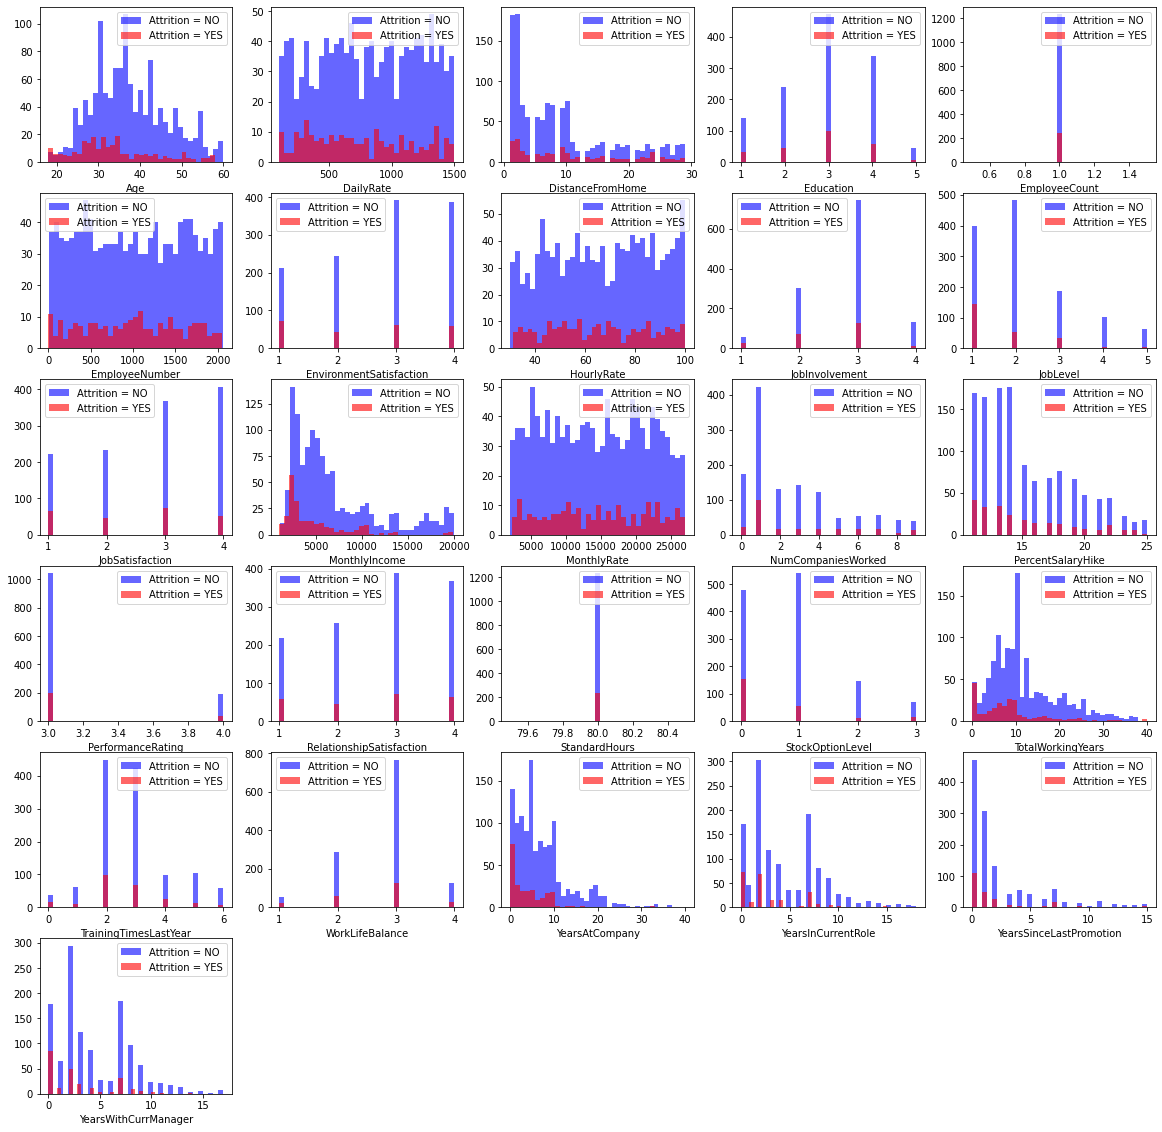

In [67]:
plt.figure(figsize=(20, 20))
plotnumber=1
for column in num_features:
    plt.subplot(6, 5, plotnumber)
    df[df["Attrition"] == 'No'][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 'Yes'][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plotnumber+=1
    plt.legend()
    plt.grid(False)
    plt.xlabel(column)

1. We can see employee at younger age is more likely to change jobs than senior employee

2. Distance from home is also a deciding factor for attrition

3. Satisfaction plays a very major role in attrition. If the employee is satisfied with the environment,salary,profile, he isless likely to switch jobs

4. At the initial stage in current company and current role, employee is more likely to change job.

5. Work-life balnce and salary hike also plays a major role in deciding attrition.

In [68]:
#Extracting the object type column
object_col = []
for column in df.columns:
    if df[column].dtype == object :
        object_col.append(column)

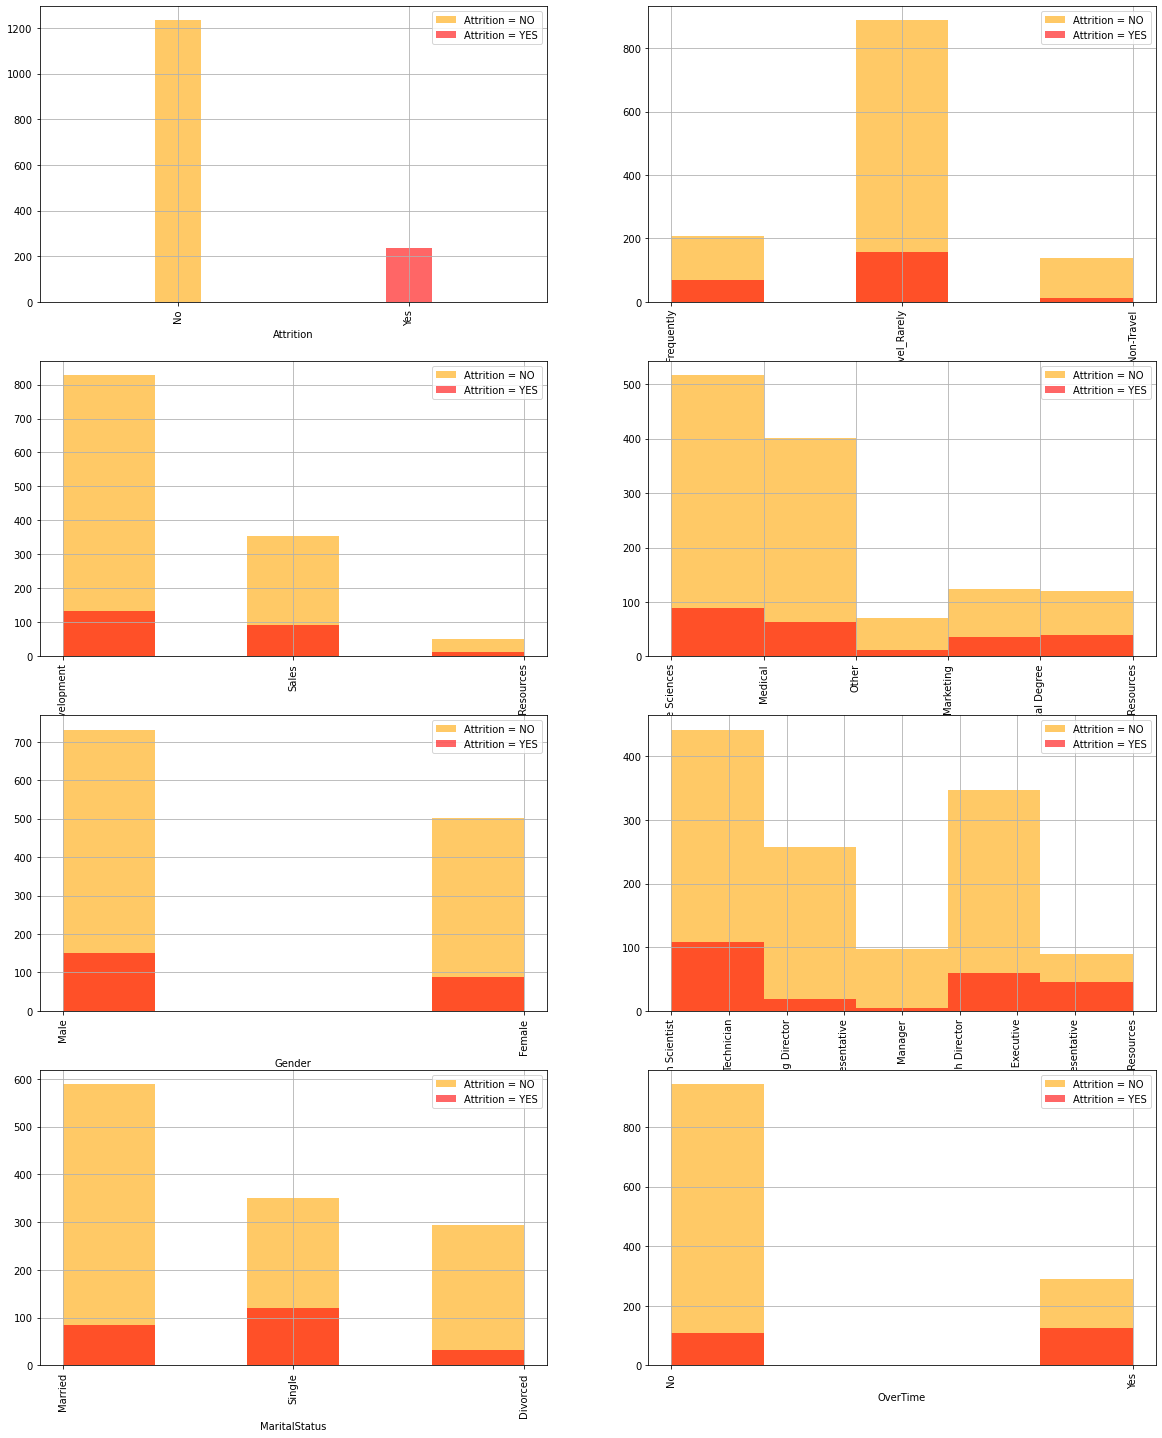

In [73]:
plt.figure(figsize=(20, 25))
plotnumber=1
for column in object_col:
    plt.subplot(4, 2, plotnumber)
    df[df["Attrition"] == 'No'][column].hist(bins=5,color='orange', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 'Yes'][column].hist(bins=5, color='red', label='Attrition = YES', alpha=0.6)
    plotnumber+=1
    plt.xticks(rotation=90)
    plt.legend()
    plt.xlabel(column)

1. Employees who travel less are more likely to stay in the comapny.

2. R&D Deaprtment have high attrition rate.

3. Reserach scientist, lab technician and single people are changing jobs more frequently.

4. Employees who are doing overtime are switching job more.

In [74]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [117]:
#Dropping these columns as they are not giving significant informaton
df.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1,inplace=True)

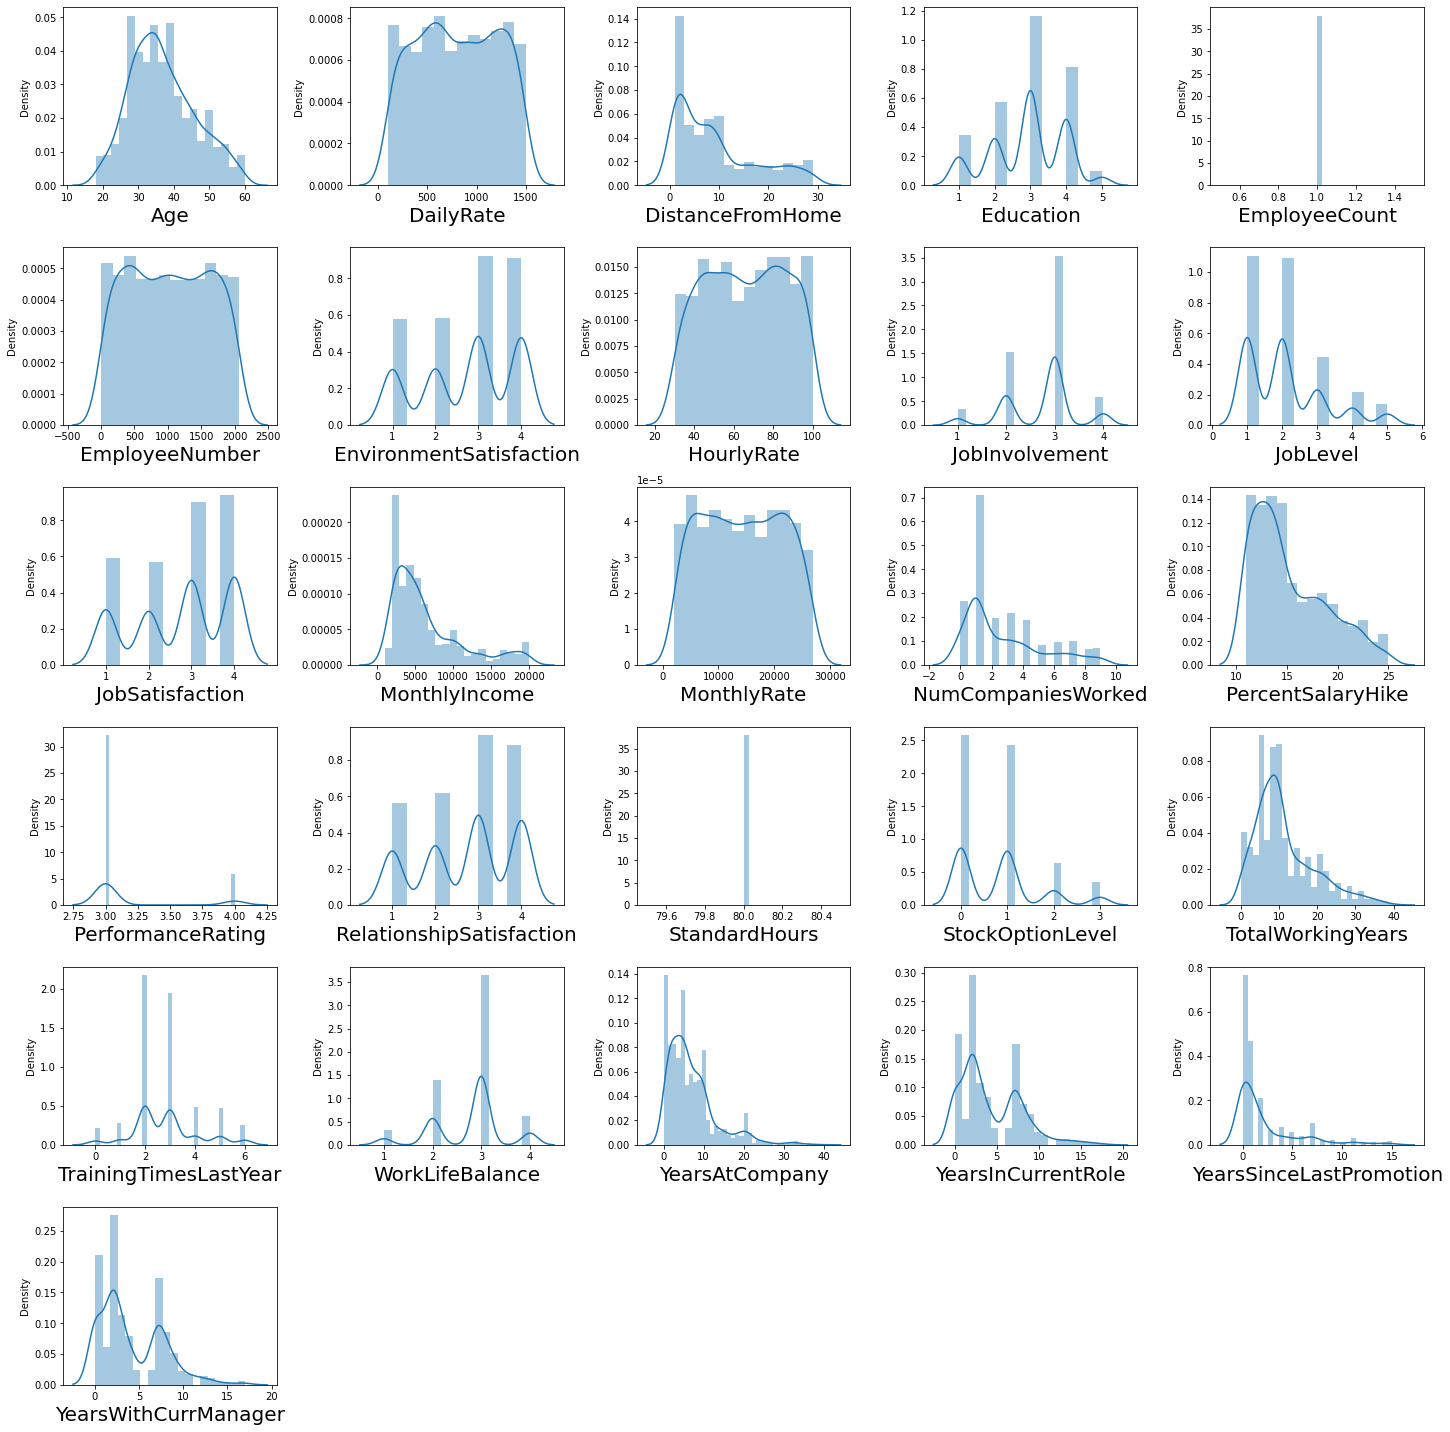

In [79]:
#Bivariate Analysis
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in num_features:
    if plotnumber<=26:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(num_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

We can see DistanceFromHome, JobInvolvement, JobLevel, Monthly income, NumCompaniesWorked, SalaryHike,Rating,StockOptionLevel, TotalWorkingYears, TrainingTimes, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion,YearsWithCurrManager is positively skewed.

In [120]:
#One Hot EnCoding for independent variables:
df = pd.get_dummies(df, columns=['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime'])

In [121]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,No,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,Yes,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,No,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,No,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [122]:
#Label Encoding for target variable
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])  

In [123]:
#Separating x and y for model evaluation
x=df.drop('Attrition',axis=1)
y=df[['Attrition']]

In [124]:
#Checking the skewness
x.skew()

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                     -0.552480
YearsAtCompany                       1.764529
YearsInCurrentRole                   0.917363
YearsSinceLastPromotion           

In [125]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
    if x[i].skew()<-0.5:
         x[i]=np.square(x[i])

x.skew()  

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                     0.186998
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             0.460775
JobSatisfaction                     -0.329672
MonthlyIncome                        0.677032
MonthlyRate                          0.018578
NumCompaniesWorked                   0.494635
PercentSalaryHike                    0.601248
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                    -0.139490
TotalWorkingYears                   -0.395296
TrainingTimesLastYear               -0.374165
WorkLifeBalance                      0.301318
YearsAtCompany                      -0.367351
YearsInCurrentRole                   0.226548
YearsSinceLastPromotion           

In [126]:
#lets bring all features to a common scale
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_=mm.fit_transform(x)
x_=pd.DataFrame(x_,columns=x.columns)
x_

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.366098,1.000000,0.475302,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.738095,0.126700,0.482552,0.00,0.666667,0.442857,0.333333,0.366098,0.333333,0.421693,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,0.909807,0.125425,0.25,1.000000,0.885714,0.333333,0.000000,0.666667,0.161012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.923407,0.213408,0.75,1.000000,0.371429,0.666667,0.000000,0.666667,0.248060,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.350036,0.125425,0.00,0.000000,0.142857,0.666667,0.000000,0.333333,0.298392,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.889761,0.25,0.666667,0.157143,1.000000,0.366098,1.000000,0.214415,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1466,0.500000,0.365784,0.394303,0.00,1.000000,0.171429,0.333333,0.622908,0.000000,0.672438,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1467,0.214286,0.037938,0.283451,0.50,0.333333,0.814286,1.000000,0.366098,0.333333,0.484026,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1468,0.738095,0.659270,0.125425,0.50,1.000000,0.471429,0.333333,0.366098,0.333333,0.438439,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [173]:
#Checking for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["variables"] = x_.columns
vif["VIF"] = [variance_inflation_factor(x_.values, i) for i in range(x_.shape[1])]

vif

,variables,VIF
0,Age,2.051405
1,DailyRate,1.034945
2,DistanceFromHome,1.024987
3,Education,1.084112
4,EnvironmentSatisfaction,1.035295
5,HourlyRate,1.027490
6,JobInvolvement,1.030573
7,JobLevel,10.328028
8,JobSatisfaction,1.026587
9,MonthlyIncome,11.661092


As JOb level and Monthly income have vif greater than 10, so we will drop JobLevel

In [174]:
x_.drop('JobLevel',axis=1,inplace=True)

Performing Over-Sampling to balance our target variable

In [175]:
from imblearn.over_sampling import SMOTE

In [176]:
SM=SMOTE()
x_over,y_over=SM.fit_resample(x_,y)

In [177]:
y_over.value_counts()

Attrition
1            1233
0            1233
dtype: int64

In [178]:
x_over.shape

(2466, 50)

In [179]:
y_over.shape

(2466, 1)

### Finding the best RandomState

In [180]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predrf=lg.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)  

Best accuracy is  0.8405405405405405  on Random_state  93


### Model Evaluation

In [181]:
#splitting data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=maxRS)

0.8351351351351352
[[302  69]
 [ 53 316]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       371
           1       0.82      0.86      0.84       369

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740



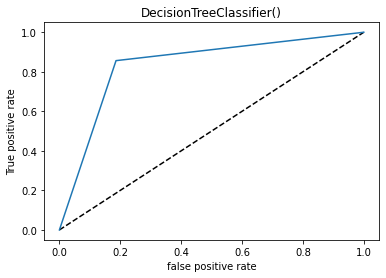

auc_score: 0.8351923680961877




In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=dtc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(dtc)
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.9459459459459459
[[355  16]
 [ 24 345]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       371
           1       0.96      0.93      0.95       369

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740



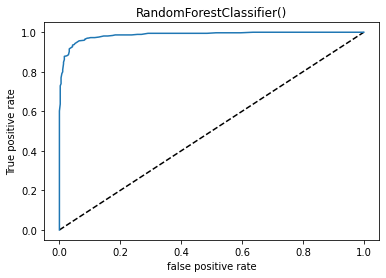

auc_score: 0.9459163324786888




In [183]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
#100 --> default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=rf)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(rf)
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.8405405405405405
[[303  68]
 [ 50 319]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       371
           1       0.82      0.86      0.84       369

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740



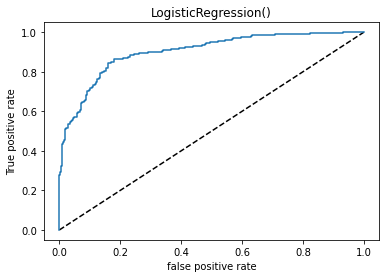

auc_score: 0.8406051176414729




In [184]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=lg)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(lg)
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

### Performing cross-validation:

In [185]:
from sklearn.model_selection import cross_val_score
dtscores=cross_val_score(dtc,x_over,y_over,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.74089069 0.88235294 0.86815416 0.88438134 0.88640974]
0.85243777254026 0.056141178913173474


In [186]:
rfscores=cross_val_score(rf,x_over,y_over,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.80364372 0.96957404 0.96754564 0.96146045 0.97565923]
0.9355766151218271 0.06612218899455785


In [187]:
lgscores=cross_val_score(lg,x_over,y_over,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.79149798 0.81947262 0.80730223 0.7505071  0.79310345]
0.7923766742492055 0.023286579634809963


After the evaluation, we can see Random Forest and logistic regression performed better. So, wee will further perform hyper-parameter tuning on them

### Hyper-Parameter Tuning

In [188]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [189]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth': [4,5,6,7,8],
    'n_estimators': [100,500],
    'max_features':['auto','sqrt','log2']
    
}

In [190]:
grid_search=RandomizedSearchCV(estimator=rf,param_distributions=grid_param,cv=5)

In [191]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 500]})

In [192]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini'}


0.9216216216216216
[[346  25]
 [ 33 336]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       371
           1       0.93      0.91      0.92       369

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



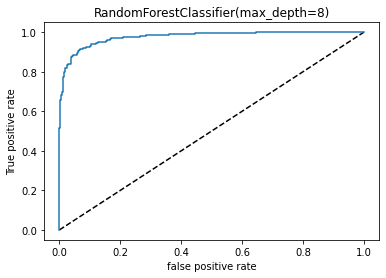

auc_score: 0.9215918304735609




In [193]:
rfc=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=100)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=rfc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(rfc)
plt.show()
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

In [194]:
rfcscores=cross_val_score(rfc,x_over,y_over,cv=5)
print(rfcscores)
print(rfcscores.mean(),rfcscores.std())

[0.79959514 0.94117647 0.94929006 0.92900609 0.95537525]
0.9148886023765922 0.05831906494331


In [195]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [196]:
logistic=LogisticRegression()
grid_search=RandomizedSearchCV(logistic,param_grid,cv=5)

In [197]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}])

In [198]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'solver': 'sag', 'penalty': 'l2', 'max_iter': 5000, 'C': 29.763514416313132}


0.8364864864864865
[[300  71]
 [ 50 319]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       371
           1       0.82      0.86      0.84       369

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740



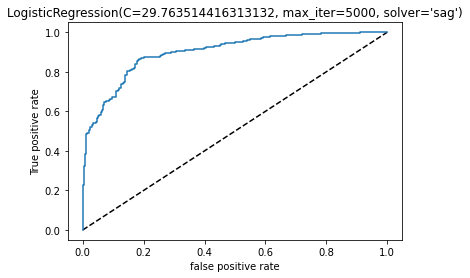

auc_score: 0.8365619909568368
[0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
0.8387755102040817 0.0016663195529137286




In [199]:
lr=LogisticRegression(C=29.763514416313132,penalty='l2',solver='sag',max_iter=5000)
lr.fit(x_train,y_train)
predlg=lr.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))
y_pred_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=lr)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(lr)
plt.show()
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print("auc_score:" ,auc_score)
lrscores=cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())
print("\n")

After performing hyper-parameter tuning, we can see random forest classifier has the least diff between cross val score and accuracy. Also Auc score for the same is higher than other models. So, I will select RandomForest as my best model. 

### Saving The Model

In [200]:
import joblib
joblib.dump(rf,'attrition.obj')

['attrition.obj']